Computer Vision Object Dectection

Computer Vision API를 사용해서 이미지속에 있는 사물을 인식하는 데모 입니다.

네트워크 통신을 위해서 requests 패키지를 import 합니다.

In [ ]:
import requests

이미지처리를 위해서 matplotlib.pyplot, Image, BytesIO 세 개의 패키지를 import 합니다.

matplotlib.pyplot는 import 할 때 시간이 조금 걸릴 수 있습니다.

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image
from io import BytesIO

In [ ]:
import json

Subscription Key와 접속에 필요한 URL을 설정합니다.

In [ ]:
subscription_key = '200b3dc6f68646e4bfafe02c1ef91601'
vision_base_url = 'https://labuser14computervision.cognitiveservices.azure.com/vision/v2.0/'

In [ ]:
analyze_url = vision_base_url + 'analyze'

분석에 사용되는 이미지를 확인 합니다.

In [ ]:
image_url = 'https://i.guim.co.uk/img/media/825f694ea76ac9d6917d6d0f3785353bcdc1ee36/0_136_3211_2168/master/3211.jpg?width=465&quality=85&dpr=1&s=none'

In [ ]:
con = requests.get(image_url).content
byte = BytesIO(con)
image = Image.open(byte)

#image = Image.open(BytesIO(requests.get(image_url).content))

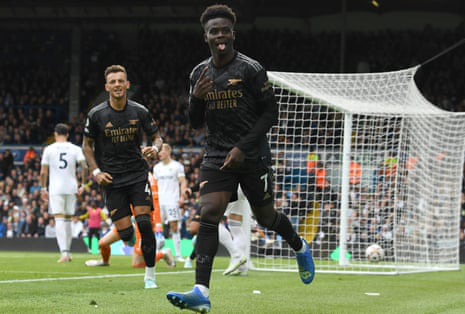

In [ ]:
image

In [ ]:
#image = Image.open(BytesIO(requests.get (image_url).content))

In [ ]:
headers = {'Ocp-Apim-Subscription-key' : subscription_key}
params = {'visualFeatures' : 'Categories,Description,Color'}
data = {'url' : image_url}

In [ ]:
response = requests.post(analyze_url, headers = headers, params = params, json = data) #get or post

ConnectionError: ignored

In [ ]:
result = response.json()

In [ ]:
result

In [ ]:
image_caption = result['description']['captions'][0]['text']

In [ ]:
image_caption

Object Detection

In [ ]:
objectDetection_url = vision_base_url + 'detect'

In [ ]:
image_url = 'https://mblogthumb-phinf.pstatic.net/MjAyMDA5MDdfMjQ1/MDAxNTk5NDY1MjUxMjM4.zbBfDyquP67Utlw2d6pFOtHqnJyfkukH3PTDgDTg8Zkg.qQWiX02sgIaExMrU-guWXKDRsmnGBBxeS_bz2Ioy8YUg.PNG.vet6390/%EA%B0%95%EC%95%84%EC%A7%80_%EA%B3%A0%EC%96%91%EC%9D%B4_%ED%95%A8%EA%BB%98_%ED%82%A4%EC%9A%B0%EA%B8%B0.PNG?type=w800'

In [ ]:
image

In [ ]:
byte = BytesIO(con)
image = Image.open(byte)

In [ ]:
headers = {'Ocp-Apim-Subscription-key' : subscription_key}
params = {'visualFeatures' : 'Categories,Description,Color'}
data = {'url' : image_url}

In [ ]:
response = requests.post(objectDetection_url, headers = headers, params = params, json = data)

In [ ]:
result = response.json()

In [ ]:
result

In [ ]:
from PIL import Image, ImageDraw, ImageFont

draw = ImageDraw.Draw(image)

In [ ]:
#boundingBox를 위한 함수
def DrawBox(detectData):
  objects = detectData['objects']

  for obj in objects:
    #print(obj)

    rect = obj['rectangle']
    print(rect)

    x = rect['x']
    y = rect['y']
    w = rect['w']
    h = rect['h']

    draw.rectangle((x,y),(x+w,y+h),outline='red')

    objectName = obj['object']
    draw.text(x,y),objectName,fill='red''

In [ ]:
DrawBox(result)

In [ ]:
image